In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import re
import pandas as pd
import numpy as np

In [2]:
gs_info = json.load(open("../data/results_grid_search.json"))

In [3]:
sorted(gs_info.items(), key=lambda x: x[1])

[('n_rows:500_n_files:100', 0.4934814158137814),
 ('n_rows:300_n_files:100', 0.49372455345449673),
 ('n_rows:200_n_files:100', 0.4948792212983803),
 ('n_rows:700_n_files:100', 0.4953543037538471),
 ('n_rows:1000_n_files:100', 0.4976028643343013),
 ('n_rows:75_n_files:100', 0.51920383633141),
 ('n_rows:50_n_files:100', 0.5205972927270528),
 ('n_rows:100_n_files:100', 0.526731102484358),
 ('n_rows:20_n_files:100', 0.5311187595737543),
 ('n_rows:1000_n_files:300', 0.7235552807108552),
 ('n_rows:50_n_files:300', 0.7292297407957892),
 ('n_rows:75_n_files:300', 0.7345213093605322),
 ('n_rows:500_n_files:300', 0.7357174713211048),
 ('n_rows:20_n_files:300', 0.7372874922715005),
 ('n_rows:700_n_files:300', 0.7376723823315479),
 ('n_rows:300_n_files:300', 0.7402992386083254),
 ('n_rows:100_n_files:300', 0.7410639052717738),
 ('n_rows:200_n_files:300', 0.74328778101241),
 ('n_rows:1000_n_files:500', 0.7633078728175929),
 ('n_rows:1000_n_files:700', 0.7872796200653839),
 ('n_rows:500_n_files:700'

In [4]:
df_dict_gs = {"Number of rows":[], "Number of files":[], "F1_macro":[]}



In [5]:
re.findall(r"n_rows:(\d+)", 'n_rows:20_n_files:1500')

['20']

In [6]:
for params, result in gs_info.items():
    n_rows = int(re.findall(r"n_rows:(\d+)", params)[0])
    n_files = int(re.findall(r"n_files:(\d+)", params)[0])
    df_dict_gs["Number of rows"].append(n_rows)
    df_dict_gs["Number of files"].append(n_files)
    df_dict_gs["F1_macro"].append(result)
    

In [7]:
df_gs = pd.DataFrame(df_dict_gs)

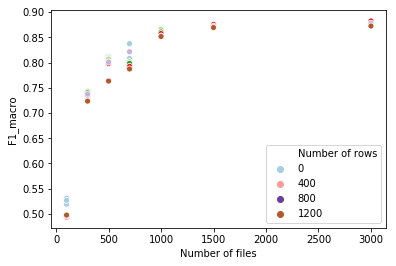

In [8]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax2 = sns.scatterplot(x="Number of files", y="F1_macro", data=df_gs, hue="Number of rows", palette="Paired")

In [ ]:
## Ablation bar graph

In [9]:
abl = json.load(open("../data/ablation_results.json"))


In [10]:
df_dict_abl = {"features_used":[], "F1_macro":[]}

In [11]:
for k,v in list(abl.items())[:-1]:
    df_dict_abl["features_used"].append(k)
    df_dict_abl["F1_macro"].append(v["f_score"])

In [12]:
df_abl = pd.DataFrame(df_dict_abl)
df_abl

,features_used,F1_macro
0,custom_features,0.216842
1,cell_features,0.739018
2,header_features,0.641906
3,custom_cell,0.641756
4,custom_header,0.610330
5,cell_header,0.882416
6,custom_cell_header,0.836456


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

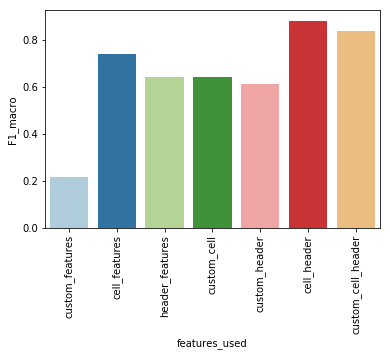

In [13]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.barplot(x="features_used", y="F1_macro", data=df_abl, palette="Paired")

plt.xticks(rotation=90)